<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Just-mammals" data-toc-modified-id="Just-mammals-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Just mammals</a></span></li><li><span><a href="#llmga" data-toc-modified-id="llmga-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>llmga</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#No.-of-genomes" data-toc-modified-id="No.-of-genomes-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>No. of genomes</a></span></li><li><span><a href="#CheckM" data-toc-modified-id="CheckM-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>CheckM</a></span><ul class="toc-item"><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Taxonomy</a></span></li><li><span><a href="#Taxonomic-novelty" data-toc-modified-id="Taxonomic-novelty-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Taxonomic novelty</a></span></li><li><span><a href="#Quality-~-Taxonomy" data-toc-modified-id="Quality-~-Taxonomy-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Quality ~ Taxonomy</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Running LLMGA pipeline on all mammal samples

# Var

In [3]:
#work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/MG_assembly_mam/LLMGA/'
work_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA/'

samples_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/samples_cov-gte0.3.tsv'
metadata_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_190529.tsv'

pipeline_dir = '/ebio/abt3_projects/Georg_animal_feces/bin/llmga/'


# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Just mammals

In [3]:
meta = read.delim(metadata_file, sep='\t') %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name, diet, habitat)
meta %>% dfhead

[1] 475   8


SampleID,class,order,family,genus,scientific_name,diet,habitat
F14_Common_Bream,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis_brama,omnivore,aquatic habitat
F35_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat
F36_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat


In [5]:
samps = read.delim(samples_file, sep='\t') %>%
    mutate(Sample = gsub('^XF', 'F', Sample))
samps %>% dfhead

[1] 291   6


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648
X80_European_Otter,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R2_final.fq.gz,1100413,0.3194258,20.45510


In [6]:
setdiff(samps$Sample, meta$Sample)

[1] "unassigned"

In [7]:
# joining
samps = samps %>%
    inner_join(meta, c('Sample'='SampleID')) 

samps %>% dfhead

Warning message:
“Column `Sample`/`SampleID` joining character vector and factor, coercing into character vector”

[1] 290  13


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity,class,order,family,genus,scientific_name,diet,habitat
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854,Mammalia,Artiodactyla,Bovidae,Bos,Bos_taurus,herbivore,terrestrial habitat
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta_africana,herbivore,terrestrial habitat
X80_European_Otter,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R2_final.fq.gz,1100413,0.3194258,20.45510,Mammalia,Carnivora,Mustelidae,Lutra,Lutra_lutra,carnivore,terrestrial habitat


In [8]:
# all metadata 
samps %>%
    group_by(class) %>%
    summarize(n = n()) %>%
    ungroup()

class,n
Actinopterygii,27
Amphibia,8
Aves,63
Mammalia,179
Reptilia,13


In [9]:
samps_f = samps %>%
    filter(class == 'Mammalia') 

samps_f %>% dfhead

[1] 179  13


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity,class,order,family,genus,scientific_name,diet,habitat
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854,Mammalia,Artiodactyla,Bovidae,Bos,Bos_taurus,herbivore,terrestrial habitat
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta_africana,herbivore,terrestrial habitat
X80_European_Otter,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R2_final.fq.gz,1100413,0.3194258,20.45510,Mammalia,Carnivora,Mustelidae,Lutra,Lutra_lutra,carnivore,terrestrial habitat


In [10]:
outF = file.path(work_dir, 'samples_mam.tsv')
samps_f %>%
    arrange(class, order, family, genus) %>%
    write.table(outF, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/MG_assembly_mam/LLMGA//samples_mam.tsv 


# llmga

In [14]:
F = file.path(work_dir, 'config.yaml')
cat_file(F)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/MG_assembly_mam/LLMGA/samples_mam.txt

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/MG_assembly_mam/LLMGA/

#-- reference genome(s) for metacompass --#
metacompass_ref: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/MG_assembly_mam/LLMGA-find-refs/ref_genomes.fna

#-- database --#
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/v2/genbank-k31.lca.json.gz
gtdbtk_db: /ebio/abt3_projects/databases_no-backup/GTDB/release89/db_info.md

#-- re-running --#
# use this to prevent re-running the assembly steps if you just need to rerun post-assembly steps


**LLMGA Run**

```
(base) @ rick:/ebio/abt3_projects/Georg_animal_feces/bin/llmga
$ screen -L -S llmga-ga ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA/config.yaml cluster.json /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA/SGE_log/ 20 --rerun-incomplete --keep-going
```

# Summary

In [57]:
asmbl_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA/'

checkm_markers_file = file.path(asmbl_dir, 'checkm', 'markers_qa_summary.tsv')
gtdbtk_bac_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_bac_summary.tsv')
gtdbtk_arc_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_ar_summary.tsv')

bin_dir = file.path(asmbl_dir, 'bin')
das_tool_dir = file.path(asmbl_dir, 'bin_refine', 'DAS_Tool')
drep_dir = file.path(asmbl_dir, 'drep', 'drep')

## Load

In [58]:
# bin genomes
## maxbin2
bin_files = list.files(bin_dir, '*.fasta$', full.names=TRUE, recursive=TRUE)
bin = data.frame(binID = gsub('\\.fasta$', '', basename(bin_files)),
                 fasta = bin_files,
                 binner = bin_files %>% dirname %>% basename,
                 sample = bin_files %>% dirname %>% dirname %>% basename)

## metabat2
bin_files = list.files(bin_dir, '*.fa$', full.names=TRUE, recursive=TRUE)
X = data.frame(binID = gsub('\\.fa$', '', basename(bin_files)),
               fasta = bin_files,
               binner = bin_files %>% dirname %>% basename,
               sample = bin_files %>% dirname %>% dirname %>% basename)

## combine
bin = rbind(bin, X)
X = NULL
bin %>% dfhead

[1] 3427    4


binID,fasta,binner,sample
coassemble_contigs.001,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//bin/F42_Fallow_Deer/maxbin2_high_prob/coassemble_contigs.001.fasta,maxbin2_high_prob,F42_Fallow_Deer
coassemble_contigs.002,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//bin/F42_Fallow_Deer/maxbin2_high_prob/coassemble_contigs.002.fasta,maxbin2_high_prob,F42_Fallow_Deer
coassemble_contigs.003,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//bin/F42_Fallow_Deer/maxbin2_high_prob/coassemble_contigs.003.fasta,maxbin2_high_prob,F42_Fallow_Deer


In [59]:
# DAS-tool genomes
dastool_files = list.files(das_tool_dir, '*.fa$', full.names=TRUE, recursive=TRUE)

dastool = data.frame(binID = gsub('\\.fa$', '', basename(dastool_files)),
                    fasta = dastool_files)
dastool %>% dfhead

[1] 339   2


binID,fasta
F42_Fallow_Deer__metabat2_low_PE.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//bin_refine/DAS_Tool/bins_DASTool_bins/F42_Fallow_Deer__metabat2_low_PE.003.contigs.fa
F90_Domestic_Dog__metabat2_high_PE.009.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//bin_refine/DAS_Tool/bins_DASTool_bins/F90_Domestic_Dog__metabat2_high_PE.009.contigs.fa
F90_Domestic_Dog__metabat2_low_PE.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//bin_refine/DAS_Tool/bins_DASTool_bins/F90_Domestic_Dog__metabat2_low_PE.003.contigs.fa


In [60]:
# drep genome files
P = file.path(drep_dir, 'dereplicated_genomes')
drep_files = list.files(P, '*.fa$', full.names=TRUE)

drep = data.frame(binID = gsub('\\.fa$', '', basename(drep_files)),
                  fasta = drep_files)
drep %>% dfhead

[1] 235   2


binID,fasta
F42_Fallow_Deer__metabat2_low_PE.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//drep/drep/dereplicated_genomes/F42_Fallow_Deer__metabat2_low_PE.003.contigs.fa
F90_Domestic_Dog__metabat2_high_PE.009.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//drep/drep/dereplicated_genomes/F90_Domestic_Dog__metabat2_high_PE.009.contigs.fa
F90_Domestic_Dog__metabat2_low_PE.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//drep/drep/dereplicated_genomes/F90_Domestic_Dog__metabat2_low_PE.003.contigs.fa


In [61]:
# checkm info
markers_sum = read.delim(checkm_markers_file, sep='\t')
markers_sum %>% nrow %>% print

drep_j = drep %>%
    inner_join(markers_sum, c('binID'='Bin.Id')) 

drep_j %>% dfhead

[1] 339


Warning message:
“Column `binID`/`Bin.Id` joining factors with different levels, coercing to character vector”

[1] 235  30


binID,fasta,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,GC.std..scaffolds...1kbp.,Coding.density,Translation.table,X..predicted.genes,X0,X1,X2,X3,X4,X5.
F42_Fallow_Deer__metabat2_low_PE.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//drep/drep/dereplicated_genomes/F42_Fallow_Deer__metabat2_low_PE.003.contigs.fa,f__Lachnospiraceae (UID1255),90,354,174,92.80,0.86,33.33,3342302,⋯,1.93,89.72,11,3245,25,326,3,0,0,0
F90_Domestic_Dog__metabat2_high_PE.009.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//drep/drep/dereplicated_genomes/F90_Domestic_Dog__metabat2_high_PE.009.contigs.fa,g__Prevotella (UID2724),55,567,296,97.97,1.35,20.00,2669064,⋯,2.59,88.95,11,2230,9,553,5,0,0,0
F90_Domestic_Dog__metabat2_low_PE.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//drep/drep/dereplicated_genomes/F90_Domestic_Dog__metabat2_low_PE.003.contigs.fa,p__Firmicutes (UID1022),100,295,158,94.78,0.63,0.00,1779646,⋯,1.87,90.32,11,1783,9,285,1,0,0,0


In [62]:
# # gtdb
# gtdbtk_sum = read.delim(gtdbtk_sum_file, sep='\t') %>%
#     dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
#     separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
# gtdbtk_sum %>% nrow %>% print


# drep_j = drep_j %>%
#     left_join(gtdbtk_sum, c('binID'='user_genome'))

# drep_j %>% dfhead

In [64]:
gtdbtk_arc_sum_file

[1] "/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//gtdbtk/gtdbtk_ar_summary.tsv"

In [69]:
# gtdb
## bacteria
X = read.delim(gtdbtk_bac_sum_file, sep='\t') %>%
    dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
    separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
X %>% nrow %>% print
## archaea
Y = read.delim(gtdbtk_arc_sum_file, sep='\t', header=FALSE) 
colnames(Y) = read.delim(gtdbtk_bac_sum_file, sep='\t') %>% colnames
Y = Y %>%
    dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
    separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
Y %>% nrow %>% print

## combined
drep_j = drep_j %>%
    left_join(rbind(X,Y), c('binID'='user_genome'))

## status
X = Y = NULL
drep_j %>% dfhead

[1] 337
[1] 2


Warning message in `[<-.factor`(`*tmp*`, ri, value = c(80.38, 98.28)):
“invalid factor level, NA generated”Warning message:
“Column `binID`/`user_genome` joining character vector and factor, coercing into character vector”

[1] 235  53


binID,fasta,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
F42_Fallow_Deer__metabat2_low_PE.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//drep/drep/dereplicated_genomes/F42_Fallow_Deer__metabat2_low_PE.003.contigs.fa,f__Lachnospiraceae (UID1255),90,354,174,92.80,0.86,33.33,3342302,⋯,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Acetatifactor;s__Acetatifactor sp002314715,77.43,0.13,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Acetatifactor;s__,Placement,taxonomic classification fully defined by topology,90.18,11,0.943623026919,N/A
F90_Domestic_Dog__metabat2_high_PE.009.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//drep/drep/dereplicated_genomes/F90_Domestic_Dog__metabat2_high_PE.009.contigs.fa,g__Prevotella (UID2724),55,567,296,97.97,1.35,20.00,2669064,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella copri,96.64,0.87,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__,ANI/Placement,topological placement and ANI have congruent species assignments,95.77,11,N/A,N/A
F90_Domestic_Dog__metabat2_low_PE.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_mam/LLMGA//drep/drep/dereplicated_genomes/F90_Domestic_Dog__metabat2_low_PE.003.contigs.fa,p__Firmicutes (UID1022),100,295,158,94.78,0.63,0.00,1779646,⋯,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Selenomonadales;f__Selenomonadaceae;g__Megamonas;s__Megamonas funiformis,98.29,0.98,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Selenomonadales;f__Selenomonadaceae;g__Megamonas;s__,ANI/Placement,topological placement and ANI have congruent species assignments,95.93,11,N/A,N/A


## No. of genomes

In [70]:
cat('Number of binned genomes:', bin$fasta %>% unique %>% length)

Number of binned genomes: 3427

In [71]:
cat('Number of DAS-Tool passed genomes:', dastool$binID %>% unique %>% length)

Number of DAS-Tool passed genomes: 339

In [72]:
cat('Number of 99% ANI de-rep genomes:', drep_j$binID %>% unique %>% length)

Number of 99% ANI de-rep genomes: 235

## CheckM

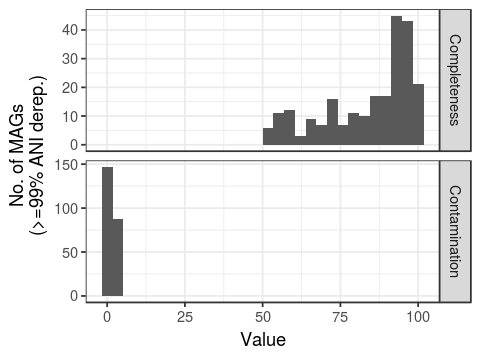

In [73]:
# checkm stats
p = drep_j %>%
    dplyr::select(binID, Completeness, Contamination) %>%
    gather(Metric, Value, -binID) %>%
    ggplot(aes(Value)) +
    geom_histogram(bins=30) +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    facet_grid(Metric ~ ., scales='free_y') +
    theme_bw()

dims(4,3)
plot(p)

### Taxonomy

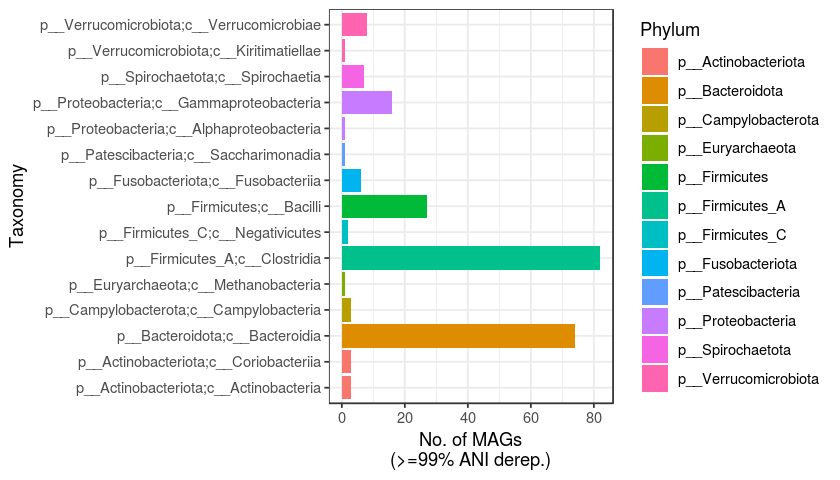

In [74]:
# summarizing by taxonomy
p = drep_j %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    theme_bw() 

dims(7,4)
plot(p)

### Taxonomic novelty

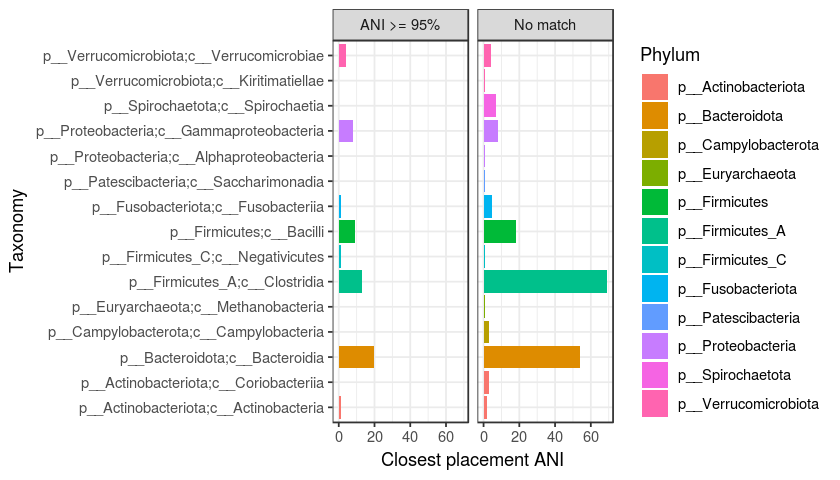

In [75]:
# no close ANI matches 
p = drep_j %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    mutate(closest_placement_ani = closest_placement_ani %>% as.character,
           closest_placement_ani = ifelse(closest_placement_ani == 'N/A', 
                                          0, closest_placement_ani),
           closest_placement_ani = ifelse(is.na(closest_placement_ani), 
                                          0, closest_placement_ani),
           closest_placement_ani = closest_placement_ani %>% as.Num) %>%
    mutate(has_species_placement = ifelse(closest_placement_ani >= 95,
                                          'ANI >= 95%', 'No match')) %>%
    ggplot(aes(Taxonomy, fill=Phylum)) +
    geom_bar() +
    facet_grid(. ~ has_species_placement) +
    coord_flip() +
    labs(y='Closest placement ANI') +
    theme_bw() 

dims(7,4)
plot(p)

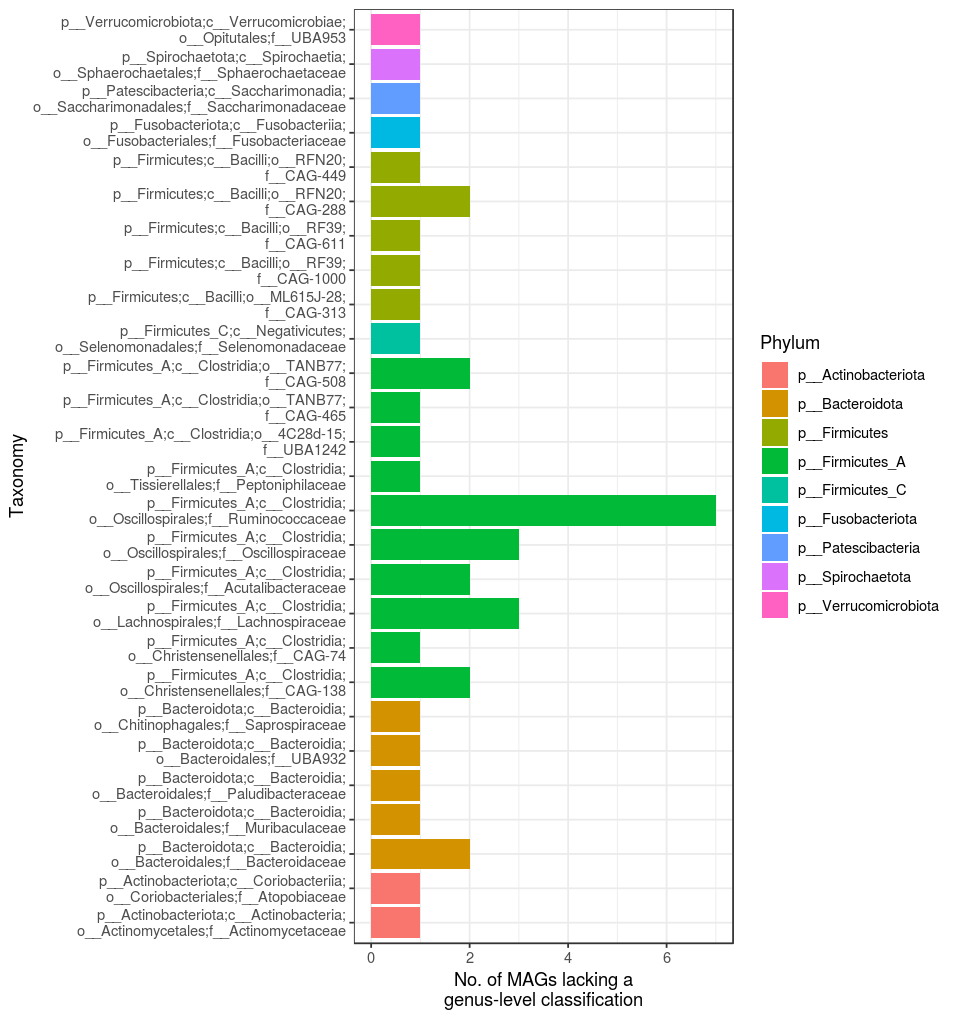

In [76]:
p = drep_j %>%
    filter(Genus == 'g__') %>%
    unite(Taxonomy, Phylum, Class, Order, Family, sep='; ', remove=FALSE) %>%
    mutate(Taxonomy = stringr::str_wrap(Taxonomy, 45),
           Taxonomy = gsub(' ', '', Taxonomy)) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs lacking a\ngenus-level classification') +
    theme_bw() 

dims(8,8.5)
plot(p)

### Quality ~ Taxonomy

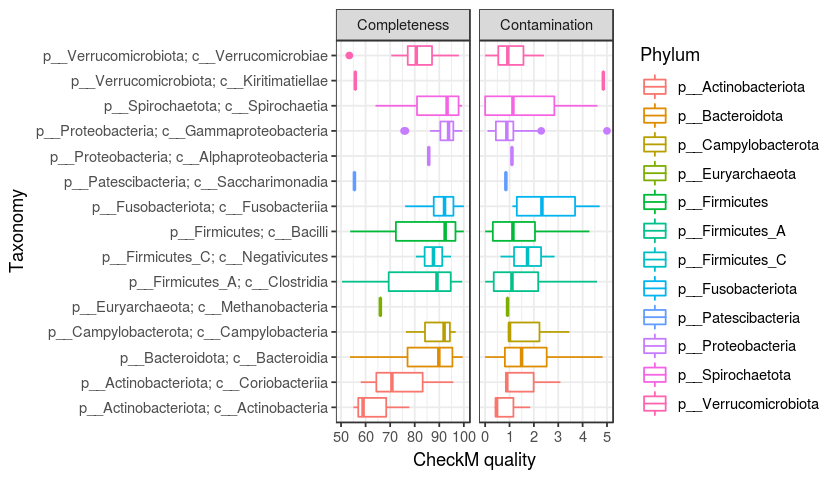

In [77]:
p = drep_j %>%
    unite(Taxonomy, Phylum, Class, sep='; ', remove=FALSE) %>%
    dplyr::select(Taxonomy, Phylum, Completeness, Contamination) %>%
    gather(Metric, Value, -Taxonomy, -Phylum) %>%
    ggplot(aes(Taxonomy, Value, color=Phylum)) +
    geom_boxplot() +
    facet_grid(. ~ Metric, scales='free_x') +
    coord_flip() +
    labs(y='CheckM quality') +
    theme_bw() 

dims(7,4)
plot(p)

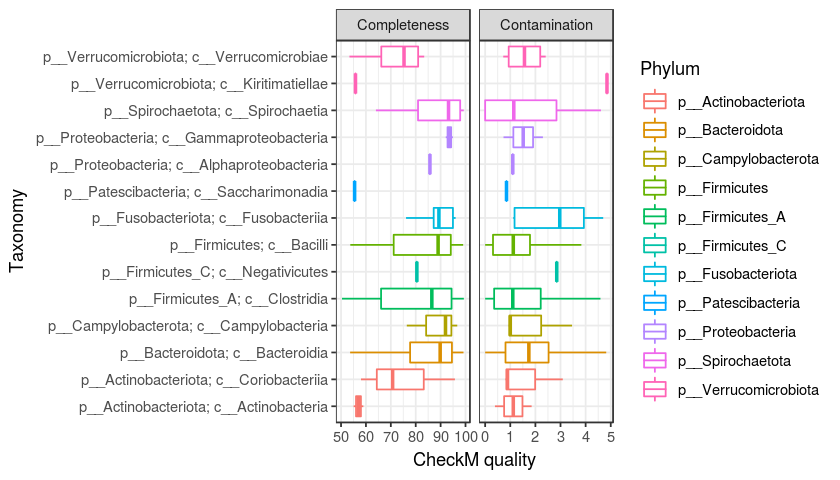

In [78]:
# just unclassified at genus/species
p = drep_j %>%
    filter(Genus == 'g__' | Species == 's__') %>%
    unite(Taxonomy, Phylum, Class, sep='; ', remove=FALSE) %>%
    dplyr::select(Taxonomy, Phylum, Completeness, Contamination) %>%
    gather(Metric, Value, -Taxonomy, -Phylum) %>%
    ggplot(aes(Taxonomy, Value, color=Phylum)) +
    geom_boxplot() +
    facet_grid(. ~ Metric, scales='free_x') +
    coord_flip() +
    labs(y='CheckM quality') +
    theme_bw() 

dims(7,4)
plot(p)

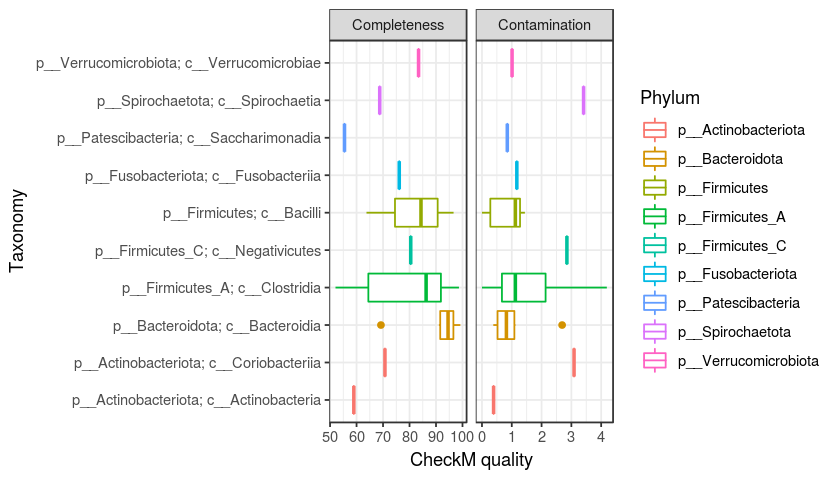

In [79]:
# just unclassified at genus
p = drep_j %>%
    filter(Genus == 'g__') %>%
    unite(Taxonomy, Phylum, Class, sep='; ', remove=FALSE) %>%
    dplyr::select(Taxonomy, Phylum, Completeness, Contamination) %>%
    gather(Metric, Value, -Taxonomy, -Phylum) %>%
    ggplot(aes(Taxonomy, Value, color=Phylum)) +
    geom_boxplot() +
    facet_grid(. ~ Metric, scales='free_x') +
    coord_flip() +
    labs(y='CheckM quality') +
    theme_bw() 

dims(7,4)
plot(p)

# sessionInfo

In [80]:
pipelineInfo(pipeline_dir)

LLMGA
=====

Ley Lab Metagenome Aseembly (LLMGA)

* Version: 0.7.0
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmga//bin/envs/anvio.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- bioconda::centrifuge
- bioconda::anvio>=5.1.0
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmga//bin/envs/bbmap.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- bioconda::bbmap=37.90
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmga//bin/envs/bowtie2.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- bioconda::samtools
- bioconda::bowtie2
- bioconda::bedtools
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmga//bin/envs/checkm.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- python=2
- pigz
- bioconda::prodigal
- bioconda::pplacer
- bioconda::checkm-genome

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmga//b

In [81]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2 ggplot2_3.0.0  tidyr_0.8.1    dplyr_0.7.6   

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselect_0.2.4 glue_1.3.0       R6_2.2.2 